In [265]:
# Import libraries:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [266]:
# Function that calculates the discount-rates sum:
def deltasum(i, n, delta):
    output = []
    while i <= n:
        otemp = delta**i
        output += [otemp]
        i += 1
    return sum(output)


# Function that calculates the quality-yield of a certain amount of effort:
def qualitycalc(effort):
    if effort > 0 and effort <= 0.5:
        quality = 2*effort
    elif effort > 0.5 and effort <= 1:
        quality = 1 - 2*(effort - 0.5)
    else:
        quality = 0
    return quality
    

# Function that calculates all Efforts in all periods for a certain deadline
def contributioncalc(deadline, plots):    
    strtemp = f"df_{deadline}"
    locals()[strtemp] = pd.DataFrame()

    period = 0
    j = 0
    indexlist = []
    while j <= deadline:
        indexlist += [j]
        j += 1
    locals()[strtemp]['Period'] = indexlist

    locals()[strtemp]['Period'] = indexlist

    while period <= deadline:
        contlist = []
        i = period
        z = 0
        v = 1
        while z < period:
            contlist += [locals()[strtemp].iloc[z,v]]
            z += 1
            v += 1


        cont = 1 - ( ( (deadline + 1 - i) - (w - sum(contlist)) ) / (1 + beta * deltasum(1, deadline - i,delta)) )
        contlist += [cont]
        i += 1
        while i <= deadline:
            calcu = (1-(1-cont)*(beta*(delta**i)))
            contlist += [calcu]
            i += 1
        # print(contlist, sum(contlist))
        locals()[strtemp][f'C_P{period}'] = contlist
        if period == deadline:
            cltemp = contlist
        x = 0
        while x < period:
            locals()[strtemp].iloc[x,period+1] = None
            x += 1
        period += 1
    if plots == True:
        plot = locals()[strtemp].plot(x = 'Period', marker = '.', markersize = 3, title = f"Effort decisions by period for deadline = {deadline}",) ##colormap = 'hot')
        #plot



    return cltemp     

In [267]:
# Assign Variables

delta = 0.9         # Discount Factor
beta = 0.9          # Temporal Bias
w = 4               # Required accumulated Effort
r = 1.03            # Opportunity cost of a less tight deadline for the organization

print(f"delta = {delta}; beta = {beta}; w = {w};")

delta = 0.9; beta = 0.9; w = 4;


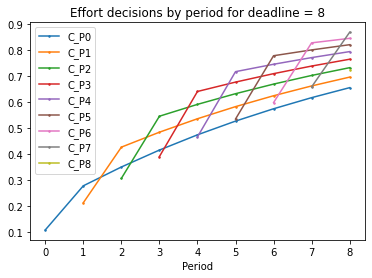

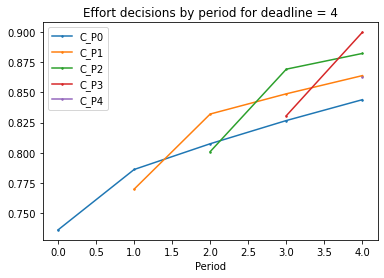

In [268]:
# Interesting Plots:
plottest1 = contributioncalc(8, True)
plottest2 = contributioncalc(4, True)

    deadline   quality  logquality   profits
0          5  4.000000    1.386294  1.195830
1          6  5.297542    1.667243  1.396290
2          7  5.789686    1.756078  1.427852
3          8  5.947810    1.783023  1.407535
4          9  5.952990    1.783894  1.367206
5         10  6.056769    1.801177  1.340244
6         11  6.243437    1.831531  1.323137
7         12  6.418967    1.859257  1.304046
8         13  6.608995    1.888432  1.285930
9         14  6.888181    1.929807  1.275830
10        15  7.069098    1.955733  1.255310
11        16  7.361147    1.996216  1.243976
12        17  7.560041    2.022877  1.223874
13        18  7.846270    2.060038  1.210055
14        19  8.046997    2.085299  1.189217
15        20  8.305264    2.116890  1.172070
16        21  8.510833    2.141340  1.151076
17        22  8.702011    2.163554  1.129143
18        23  8.941459    2.190699  1.110009
19        24  9.116923    2.210132  1.087239
20        25  9.300024    2.230017  1.065069
21        

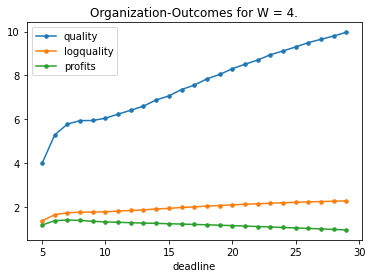

In [269]:
qualitydf = pd.DataFrame()
deadlinelist = []
qualitylist = []

t = int(w) + 1
b = 6*t

while t < b:
    quallist = [qualitycalc(i) for i in contributioncalc(t, False)]
    qualitylist += [sum(quallist)]
    deadlinelist += [t]
    t += 1

logquality = [numpy.log(i) for i in qualitylist]

qualitydf['deadline'] = deadlinelist
qualitydf['quality'] = qualitylist
qualitydf['logquality'] = logquality

rows = len(qualitydf)
profitlist = []
f = 0

while f < rows:
    dlin = qualitydf.iloc[f,0]
    lqual = qualitydf.iloc[f,2]
    profit = ((1/(r**dlin))*lqual)
    profitlist += [profit]
    f += 1

qualitydf['profits'] = profitlist

qualitydf.plot(x = 'deadline', marker = '.', markersize = 7, title = f"Organization-Outcomes for W = {w}.")

print(qualitydf)

maxprofit = qualitydf['profits'].idxmax()
optimaldeadline = qualitydf.iloc[maxprofit,0]

print(f"The optimal Deadline is: {optimaldeadline} Periods.")